In [1]:
import numpy as np
import tensorflow as tf
from keras.layers import AveragePooling3D

Using TensorFlow backend.


In [19]:
import moviepy
import imageio
import moviepy.editor
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage

In [4]:
#For Testing
vid = moviepy.editor.VideoFileClip('/Users/mikey/Downloads/M2U00020.MPG', 'ffmpeg')

In [5]:
#For testing
#Convert 3 channel array to single channel gray scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [42]:
#For testing
# Take in video clip (subclip) and calculate differences of frames on interval (diff_int) in number of frames
# Return numpy array of differences

def frameDifference(subclip, diff_int, new_y, new_x):
    
    #Calculate num of frames - rounded down to integer
    num_frames = int(subclip.duration*subclip.fps)
    
    # get dimensions of subclip
    [n_y, n_x, n_c] = subclip.get_frame(0).shape

    # Create placeholder for numpy array
    diff_subclip_np = np.zeros((int(num_frames/diff_int), new_y, new_x), dtype=np.uint8)

    # Iterate through slices of subclip and add to numpy array
    ii = 0;
    for nn in range(0, num_frames - diff_int, diff_int):
        diff_frame = (abs(rgb2gray(subclip.get_frame(nn*1/subclip.fps)) - rgb2gray(subclip.get_frame((nn+diff_int)*1/subclip.fps))))
        diff_subclip_np[ii, :, :] = np.float32(skimage.transform.resize(diff_frame, [new_y, new_x]))
        ii+=1;
        
    return diff_subclip_np

In [66]:
#For testing
test = vid.subclip(0, 11)
testdiff = frameDifference(test, 10, 100, 100)

(32, 100, 100)


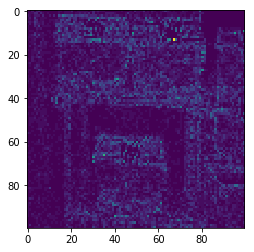

In [67]:
#For testing
plt.imshow(testdiff[0, : ,:])
print(testdiff.shape)

In [118]:
#testing
testdiff2 = np.ones([1, 32, 100, 100, 1])
testdiff2.shape
testdiff2[0, :, :, :, 0] = testdiff
testdiff2= np.float32(testdiff2)
#type(testdiff[0][0][0])
#type(testdiff2[0][0][0][0][0])
testdiff2.shape

(1, 32, 100, 100, 1)

In [15]:
def _weight_variable(name, shape):
        return tf.get_variable(name, shape, DTYPE, tf.truncated_normal_initializer(stddev=0.1))

In [16]:
def _bias_variable(name, shape):
        return tf.get_variable(name, shape, DTYPE, tf.constant_initializer(0.1, dtype=DTYPE))

In [121]:
def build_3d_conv_network(processed_images, outputs, output_size=1, filter_size=3):
        
    #input_data is a numpy array of shape [batch, depth (time), n_x, n_y, channels = 1]
    #outputs is ?

    prev_layer = processed_images
    in_filters = prev_layer.shape[4]


    with tf.variable_scope('conv1') as scope:

        #kernel shape: [filter_depth, filter_height, filter_width, in_channels, out_channels]

        out_filters = 16
        kernel = _weight_variable('weights', [filter_size, filter_size, filter_size, in_filters, out_filters]) 
        conv = tf.nn.conv3d(prev_layer, kernel, strides=[1, 1, 1, 1, 1], padding='SAME')
        biases = _bias_variable('biases', [out_filters])
        bias = tf.nn.bias_add(conv, biases)
        conv1 = tf.nn.relu(bias, name=scope.name)

        in_filters = out_filters

        #Max pool operation of time domain
        pool1 = tf.nn.max_pool3d(conv1, ksize=[1, 2, 1, 1, 1], strides=[1, 2, 1, 1, 1], padding='SAME')
        prev_layer = pool1

    with tf.variable_scope('conv2') as scope:

        #kernel shape: [filter_depth, filter_height, filter_width, in_channels, out_channels]

        out_filters = 16
        kernel = _weight_variable('weights', [filter_size, filter_size, filter_size, in_filters, out_filters])
        conv = tf.nn.conv3d(prev_layer, kernel, strides=[1, 1, 1, 1, 1], padding='SAME')
        biases = _bias_variable('biases', [out_filters])
        bias = tf.nn.bias_add(conv, biases)
        conv2 = tf.nn.relu(bias, name=scope.name)

        in_filters = out_filters

        #Max pool operation of time domain
        pool2 = tf.nn.max_pool3d(conv2, ksize=[1, 2, 1, 1, 1], strides=[1, 2, 1, 1, 1], padding='SAME')
        prev_layer = pool2

    with tf.variable_scope('conv3') as scope:

        #kernel shape: [filter_depth, filter_height, filter_width, in_channels, out_channels]

        out_filters = 16
        kernel = _weight_variable('weights', [filter_size, filter_size, filter_size, in_filters, out_filters])
        conv = tf.nn.conv3d(prev_layer, kernel, strides=[1, 1, 1, 1, 1], padding='SAME')
        biases = _bias_variable('biases', [out_filters])
        bias = tf.nn.bias_add(conv, biases)
        conv3 = tf.nn.relu(bias, name=scope.name)

        in_filters = out_filters

        #Max pool operation of time domain
        pool3 = tf.nn.max_pool3d(conv3, ksize=[1, 2, 1, 1, 1], strides=[1, 2, 1, 1, 1], padding='SAME')
        prev_layer = pool3

    with tf.variable_scope('conv4') as scope:

        #kernel shape: [filter_depth, filter_height, filter_width, in_channels, out_channels]

        out_filters = 16
        kernel = _weight_variable('weights', [filter_size, filter_size, filter_size, in_filters, out_filters])
        conv = tf.nn.conv3d(prev_layer, kernel, strides=[1, 1, 1, 1, 1], padding='SAME')
        biases = _bias_variable('biases', [out_filters])
        bias = tf.nn.bias_add(conv, biases)
        conv4 = tf.nn.relu(bias, name=scope.name)

        in_filters = out_filters

        #Max pool operation of time domain
        pool4 = tf.nn.max_pool3d(conv4, ksize=[1, 2, 1, 1, 1], strides=[1, 2, 1, 1, 1], padding='SAME')
        prev_layer = pool4

    with tf.variable_scope('conv5') as scope:

        #kernel shape: [filter_depth, filter_height, filter_width, in_channels, out_channels]

        out_filters = 16
        kernel = _weight_variable('weights', [filter_size, filter_size, filter_size, in_filters, out_filters])
        conv = tf.nn.conv3d(prev_layer, kernel, strides=[1, 1, 1, 1, 1], padding='SAME')
        biases = _bias_variable('biases', [out_filters])
        bias = tf.nn.bias_add(conv, biases)
        conv5 = tf.nn.relu(bias, name=scope.name)

        in_filters = out_filters

        #Max pool operation over time domain
        pool5 = tf.nn.max_pool3d(conv5, ksize=[1, 2, 1, 1, 1], strides=[1, 2, 1, 1, 1], padding='SAME')
        prev_layer = pool5
        print(prev_layer.shape)

    #Global Average Pooling

    conv5_dim_x = prev_layer.shape[2] #Need n_x dimension of last layer for global pool step 
    conv5_dim_y = prev_layer.shape[3] #Need n_x dimension of last layer for global pool step
    
    glob_pool = AveragePooling3D(pool_size=(1, conv5_dim_x, conv5_dim_y), strides=(1, 1, 1), dim_ordering='tf')(prev_layer)
    prev_layer = glob_pool


    #Binary layers

    with tf.variable_scope('binary1') as scope:

        out_filters = 2
        kernel = _weight_variable('weights', [1, 1, 1, in_filters, out_filters]) 
        conv = tf.nn.conv3d(prev_layer, kernel, strides=[1, 1, 1, 1, 1], padding='SAME')
        biases = _bias_variable('biases', [out_filters])
        bias = tf.nn.bias_add(conv, biases)
        binary = tf.nn.relu(bias, name=scope.name)

        in_filters = out_filters
        
        prev_layer = binary

    with tf.variable_scope('binary2') as scope:

        out_filters = 2
        kernel = _weight_variable('weights', [1, 1, 1, in_filters, out_filters]) 
        conv = tf.nn.conv3d(prev_layer, kernel, strides=[1, 1, 1, 1, 1], padding='SAME')
        biases = _bias_variable('biases', [out_filters])
        bias = tf.nn.bias_add(conv, biases)
        binary = tf.nn.relu(bias, name=scope.name)

        in_filters = out_filters
        
        prev_layer = binary
        
    with tf.variable_scope('binary3') as scope:

        out_filters = 2
        kernel = _weight_variable('weights', [1, 1, 1, in_filters, out_filters]) 
        conv = tf.nn.conv3d(prev_layer, kernel, strides=[1, 1, 1, 1, 1], padding='SAME')
        biases = _bias_variable('biases', [out_filters])
        bias = tf.nn.bias_add(conv, biases)
        binary = tf.nn.relu(bias, name=scope.name)

        in_filters = out_filters
        
        prev_layer = binary

            
    #FC --> sigmoid layer --> prediction probability
        
    x = tf.layers.flatten(prev_layer)
    pred = tf.layers.dense(x, output_size, activation=tf.sigmoid)
    
    
    #error = tf.add(tf.multiply(tf.multiply(outputs, -tf.log(pred)), false_neg_pen),
              #tf.multiply(tf.subtract(1.0, outputs), -tf.log(tf.subtract(1.0, pred))))
    #error = tf.reduce_mean(error)
    #t_vars = tf.trainable_variables()
    
    #error
    
    #inputs, outputs, pred, error, loss, train_fn
    
    #loss_l2 = tf.add_n([ tf.nn.l2_loss(v) for v in t_vars
                   #if 'bias' not in v.name ]) * reg_pen
    #loss = loss_l2 + error
    
    return pred #, error, loss

In [122]:
#testing function
tf.reset_default_graph()
with tf.Session() as sess:
    
    DTYPE = tf.float32
    pred = build_3d_conv_network(testdiff2, 1, filter_size=3)
    print(pred[0][0])

(1, 1, 100, 100, 16)
Tensor("strided_slice_1:0", shape=(), dtype=float32)
